In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

In [32]:
data = pd.read_table('E:/ml_Dzyuin/Практика_8-9/D31.txt')
data
X = []
d = []
for i in range(0,len(data['x2'])):
    d.append(data['x1'][i])
    d.append(data['x2'][i])
    X.append(d)
    d = []
X = np.array(X)

In [33]:
plt.scatter(data['x1'],data['x2'], label='True Position')
plt.show()

In [34]:
kmeans = KMeans(n_clusters=31, n_init=10)
kmeans.fit(X)

KMeans(n_clusters=31, n_init=10)

In [35]:
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='k')
plt.show()

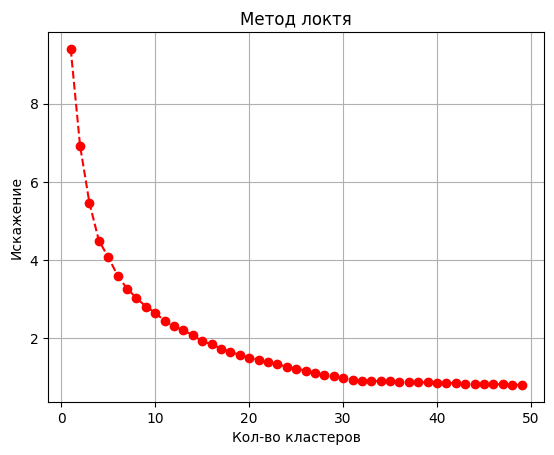

In [36]:
distortions = []
istortions = []
inertias = []
q1 = {}
q2 = {}
K = range(1, 50)
for k in K:

    kmeanModel = KMeans(n_clusters=k, n_init=10).fit(X)
    kmeanModel.fit(X)

    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
    q1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    q2[k] = kmeanModel.inertia_


plt.plot(K, distortions, 'ro--')
plt.xlabel('Кол-во кластеров')
plt.ylabel('Искажение')
plt.title('Метод локтя')
plt.grid(True)
plt.show()

In [37]:
range_n_clusters = list (range(2,50))
clast_ = []
score_ = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, n_init=10)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    clast_.append(n_clusters)
    score_.append(score)
    print("Кол-во кластеров = {}, индекс силуэта {}".format(n_clusters, score))
'''
исходя из графика, оптимальное количество кластеров составляет 31
'''

plt.plot(clast_, score_, 'ko')
plt.xlabel('Кол-во кластеров')
plt.ylabel('индекс силуэта')
plt.title('Силуэт')
plt.grid(True)
plt.show()

Кол-во кластеров = 2, индекс силуэта 0.39415786927801555
Кол-во кластеров = 3, индекс силуэта 0.4206646405594788
Кол-во кластеров = 4, индекс силуэта 0.4275917422737578
Кол-во кластеров = 5, индекс силуэта 0.41131861116327295
Кол-во кластеров = 6, индекс силуэта 0.4207954040869908
Кол-во кластеров = 7, индекс силуэта 0.42420706528992624
Кол-во кластеров = 8, индекс силуэта 0.43656419218998543
Кол-во кластеров = 9, индекс силуэта 0.44783922681844174
Кол-во кластеров = 10, индекс силуэта 0.4540002255962112
Кол-во кластеров = 11, индекс силуэта 0.45943480563703964
Кол-во кластеров = 12, индекс силуэта 0.4548977453265069
Кол-во кластеров = 13, индекс силуэта 0.46225547506467035
Кол-во кластеров = 14, индекс силуэта 0.47026912180811437
Кол-во кластеров = 15, индекс силуэта 0.4803330364042326
Кол-во кластеров = 16, индекс силуэта 0.48402611261137246
Кол-во кластеров = 17, индекс силуэта 0.4930306666656238
Кол-во кластеров = 18, индекс силуэта 0.4914404252593673
Кол-во кластеров = 19, индекс 